In [1]:
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline

/home/crawforc3/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/crawforc3/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


../train_images/2308.tif


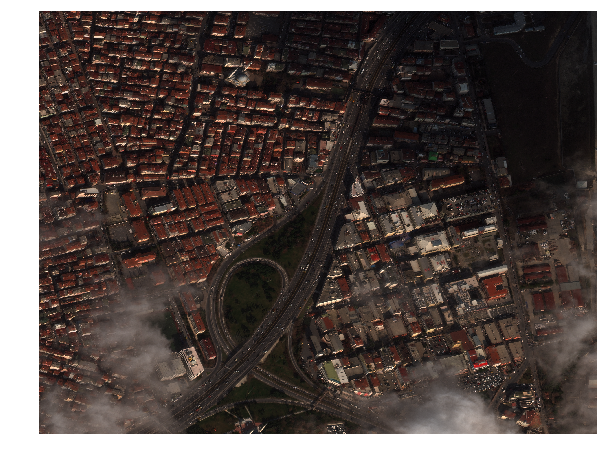

In [2]:
#Load an image
path = '../train_images'
chip_name = '2308.tif'
image = path + '/' + chip_name
print(image)
arr = wv.get_image(image)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(arr)

In [3]:
#Loading our labels
coords, chips, classes = wv.get_labels('../xView_train.geojson')
#We only want to coordinates and classes that are within our chip
coords = coords[chips==chip_name]
classes = classes[chips==chip_name].astype(np.int64)

100%|██████████| 601937/601937 [00:03<00:00, 169556.14it/s]


In [4]:
print(np.unique(classes))

[13 18 19 21 23 24 25 29 60 65 73 75 77 83 84]


In [5]:
#Load the class number -> class string label map
labels = {}
with open('xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels[int(row[0].split(":")[0])] = row[0].split(":")[1]

In [6]:
#We can find which classes are present in this image
#print([labels[int(i)] for i in np.unique(classes)])
try:
    for i in np.unique(classes):
        print(labels[int(i)])
except KeyError:
    pass

Cargo Plane
Small Car
Bus
Utility Truck
Truck
Cargo Truck
Truck w/Box
Truck w/Liquid
Dump Truck
Cement Mixer
Building
Unknown
Facility
Vehicle Lot
Helipad


In [7]:
#We can chip the image into 500x500 chips
c_img, c_box, c_cls = wv.chip_image(img = arr, coords= coords, classes=classes, shape=(500,500))
print("Num Chips: %d" % c_img.shape[0])


Num Chips: 35


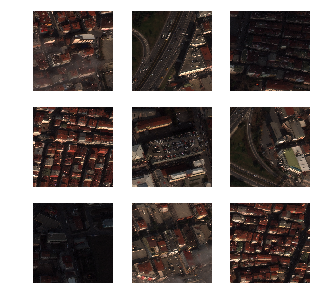

In [8]:
#We can plot some of the chips
fig,ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(5)

for k in range(9):
    plt.subplot(3,3,k+1)
    plt.axis('off')
    plt.imshow(c_img[np.random.choice(range(c_img.shape[0]))])

plt.show()

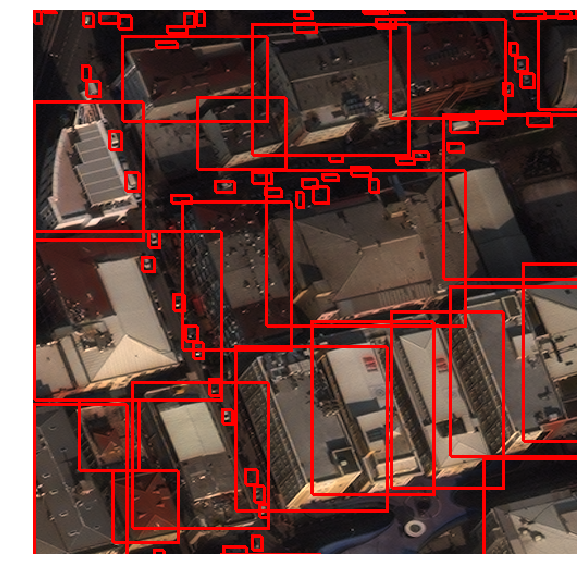

In [15]:
#We can visualize the chips with their labels
ind = np.random.choice(range(c_img.shape[0]))
labelled = aug.draw_bboxes(c_img[ind],c_box[ind])
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(labelled)

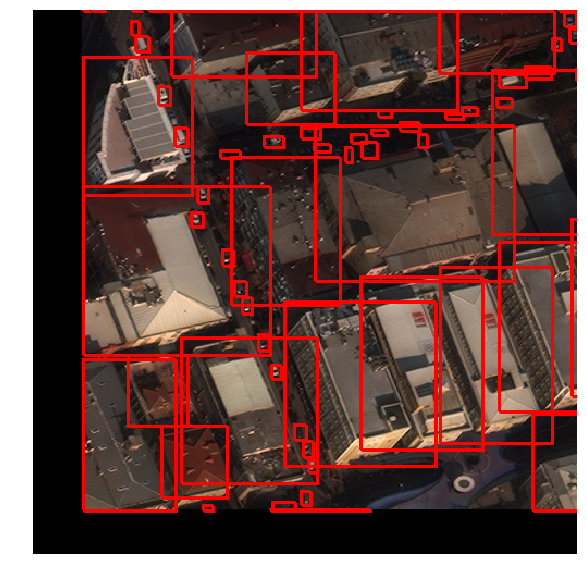

In [16]:
#We can shift the chips
i1,b1 = aug.shift_image(c_img[ind],c_box[ind])
a1 = aug.draw_bboxes(i1,b1)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(a1)

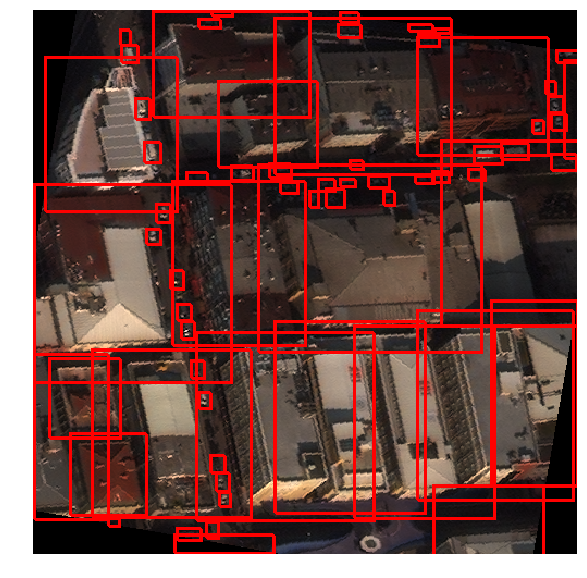

In [17]:
#We can rotate the chips
center = (int(c_img[ind].shape[0]/2),int(c_img[ind].shape[1]/2))
i2,b2 = aug.rotate_image_and_boxes(c_img[ind],10, center, c_box[ind])
a2 = aug.draw_bboxes(i2,b2)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(a2)

In [12]:
#There are other augmentations available in 'aug_util.py'
#From here, you can save out the chipped images to a TFRecord or other medium
#Use 'process_wv.py' to create a TFRecord file from xView imagery